In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


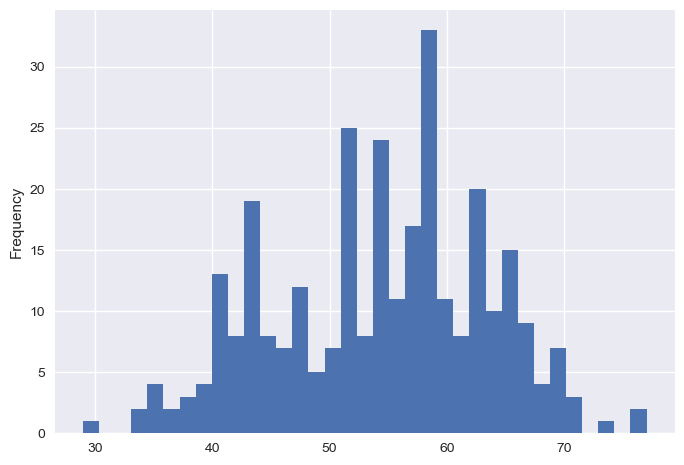

In [36]:
df['age'].plot.hist(bins=35);

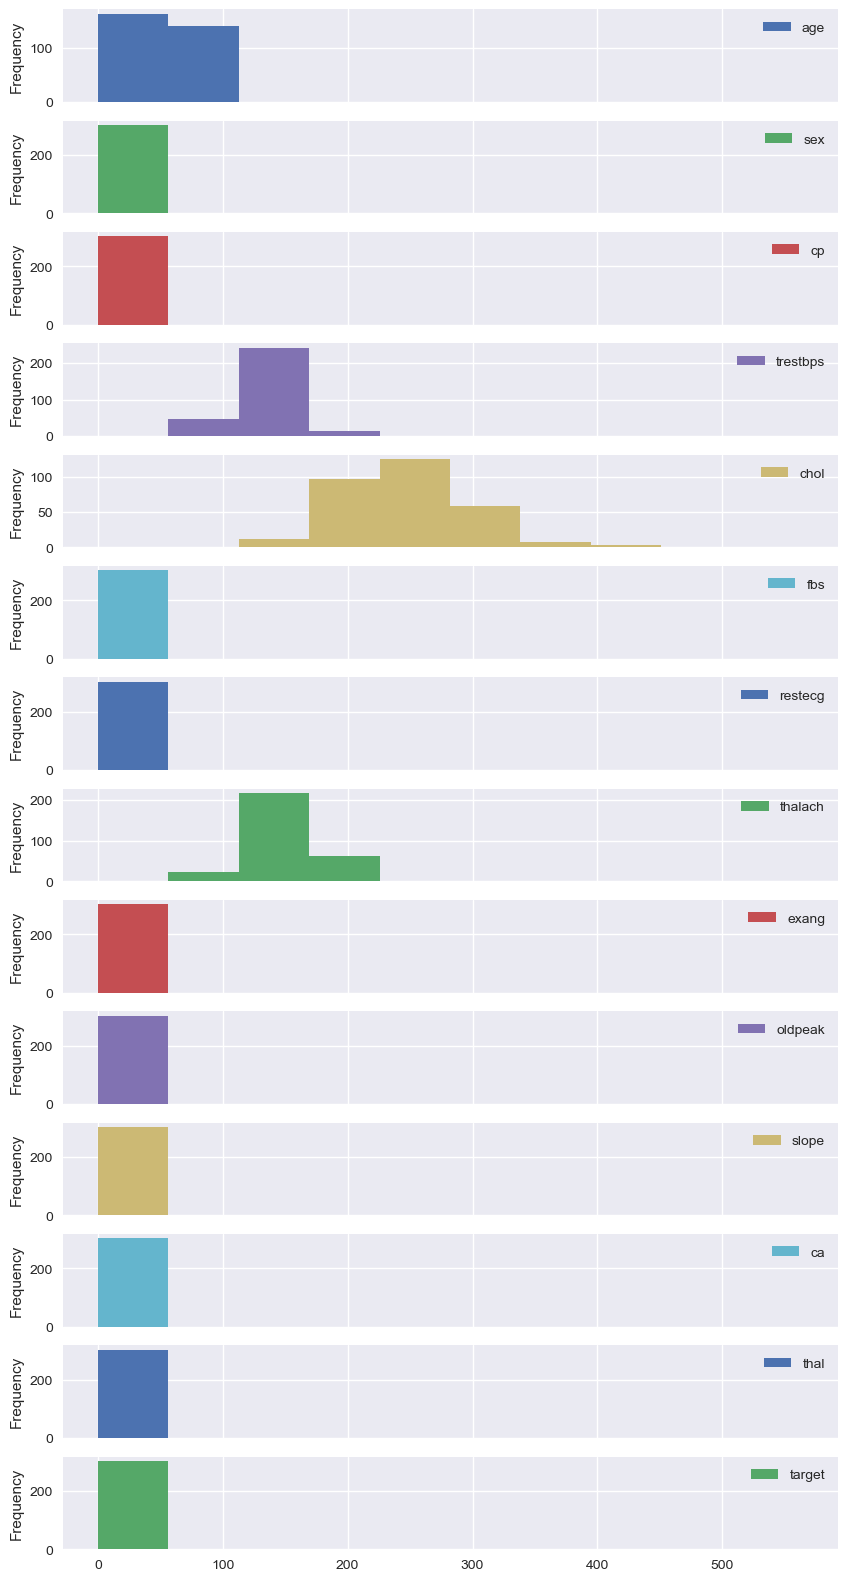

In [37]:
df.plot.hist(subplots=True,figsize=(10,20));

In [38]:
plt.style.use("seaborn-v0_8")

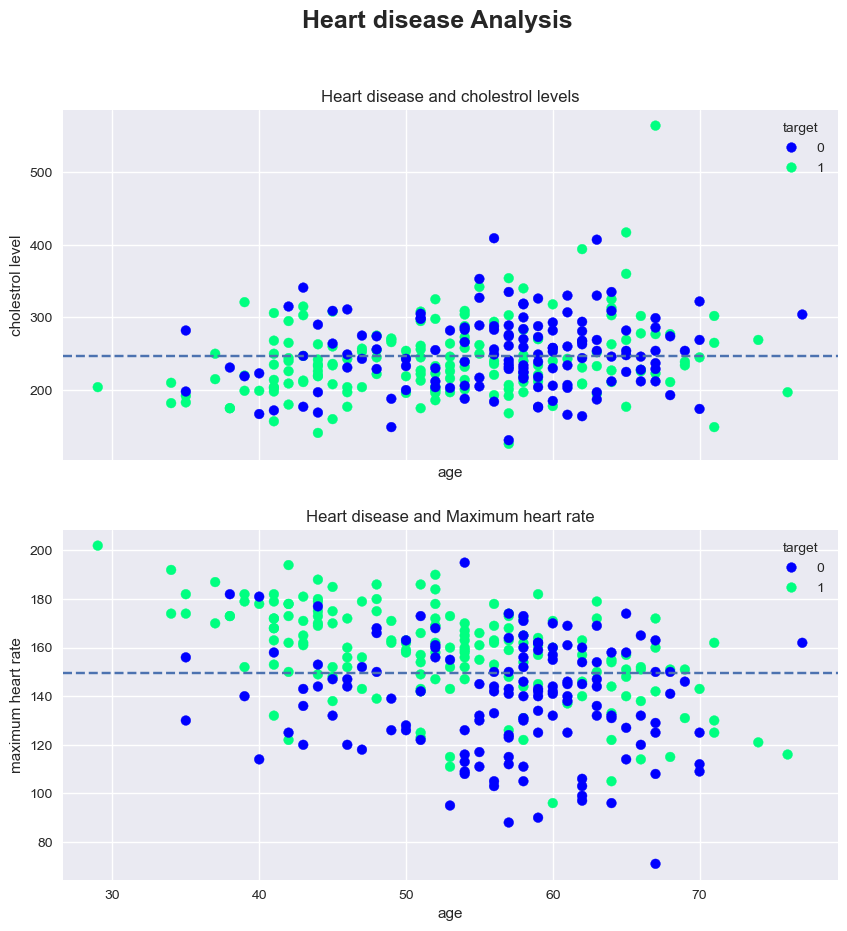

In [39]:
fig,(ax0,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(10,10),sharex=True)

scatter1 = ax0.scatter(x=df['age'],y=df['chol'],c=df['target'],cmap="winter")
ax0.set(title="Heart disease and cholestrol levels",xlabel="age",ylabel="cholestrol level")
ax0.legend(*scatter1.legend_elements(),title='target')
ax0.axhline(df['chol'].mean(),linestyle="--")

scatter2 = ax1.scatter(x=df['age'],y=df['thalach'],c=df['target'],cmap="winter")
ax1.set(title="Heart disease and Maximum heart rate",xlabel="age",ylabel="maximum heart rate")
ax1.legend(*scatter2.legend_elements(),title="target")
ax1.axhline(df['thalach'].mean(),linestyle='--')

fig.suptitle("Heart disease Analysis",fontsize=18,fontweight="bold");

In [40]:
from sklearn.preprocessing import StandardScaler

binary_features = ['sex', 'fbs', 'exang']
multi_class_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

df_encoded = pd.get_dummies(df, columns=multi_class_features, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop(columns=['target'])  # Features
y = df_encoded['target']  # Target
#saving the preprocessed file's
X.to_csv("preprocessed_features.csv", index=False)
y.to_csv("preprocessed_target.csv", index=False)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [50]:
y_pred1 = model1.predict(X_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
accuracy1 = accuracy_score(y_test, y_pred)
classification_rep1 = classification_report(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)

In [44]:
print("Model accuracy: ",accuracy1*100)
print("Classification report: \n",classification_rep1)
print("Confusion matrix: \n",conf_matrix1)

Model accuracy:  90.1639344262295
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion matrix: 
 [[27  2]
 [ 4 28]]


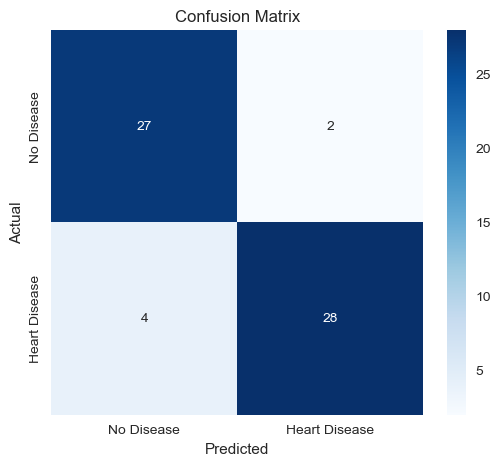

In [45]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Heart Disease"], yticklabels=["No Disease", "Heart Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

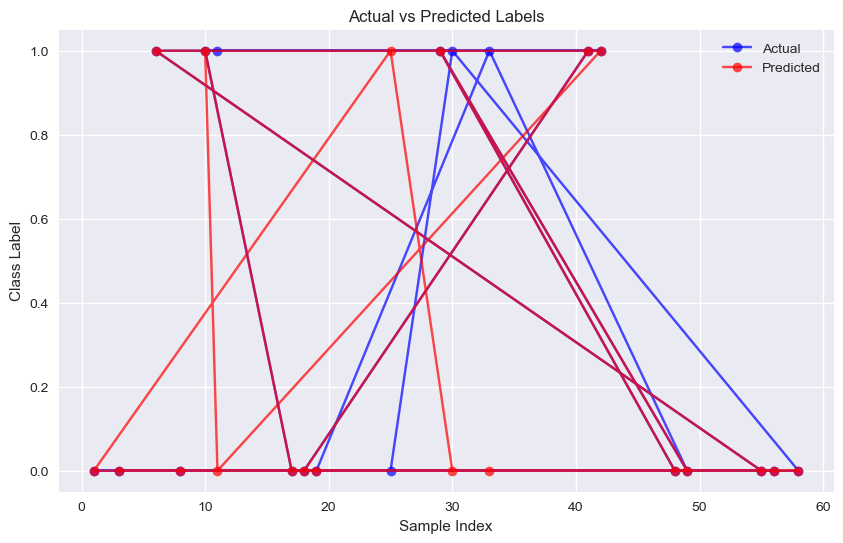

In [33]:
import numpy as np

# Random sample to avoid overcrowding the plot
sample_size = 20
indices = np.random.choice(range(len(y_test)), sample_size, replace=False)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test.iloc[indices].values, 'bo-', label="Actual", alpha=0.7)
plt.plot(indices, y_pred[indices], 'ro-', label="Predicted", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted Labels")
plt.legend()
plt.show()

In [29]:
import joblib
# saving the model,scaler and columns to use it further
joblib.dump(model, "heart_disease_model.pkl")
print("Model saved!")

joblib.dump(scaler, "scaler.pkl")
print("Scaler saved!")

X_columns = list(X.columns)
joblib.dump(X_columns, "X_columns.pkl")
print("Training feature columns saved!")

Model saved!
Scaler saved!
Training feature columns saved!


In [30]:
# loading the model,scaler and columns to test

model = joblib.load("heart_disease_model.pkl")
scaler = joblib.load("scaler.pkl")
X_columns = joblib.load("X_columns.pkl")

print("Model, scaler, and feature columns loaded!")

Model, scaler, and feature columns loaded!


In [32]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

age = float(input("Enter age: "))
sex = int(input("Enter sex (0 = female, 1 = male): "))
trestbps = float(input("Enter resting blood pressure: "))
chol = float(input("Enter cholesterol level: "))
fbs = int(input("Enter fasting blood sugar (0 or 1): "))
thalach = float(input("Enter max heart rate achieved: "))
exang = int(input("Enter exercise-induced angina (0 or 1): "))
oldpeak = float(input("Enter ST depression induced by exercise: "))
cp = int(input("Enter chest pain type (e.g., 0-3): "))
restecg = int(input("Enter resting ECG (e.g., 0-2): "))
slope = int(input("Enter slope of the peak exercise ST segment (e.g., 0-2): "))
ca = int(input("Enter number of major vessels colored by fluoroscopy (e.g., 0-4): "))
thal = int(input("Enter thal (e.g., 1 = normal; 2 = fixed defect; 3 = reversable defect): "))

input_data = {'age': age,'sex': sex,'trestbps': trestbps,'chol': chol,'fbs': fbs,'thalach': thalach,'exang': exang,'oldpeak': oldpeak,'cp': cp,'restecg': restecg,'slope': slope,'ca': ca,'thal': thal}
input_df = pd.DataFrame([input_data])
print("Sample input data received:\n")
print(input_df)

input_encoded = pd.get_dummies(input_df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)
input_encoded = input_encoded.reindex(columns=X_columns, fill_value=0)

input_encoded[numerical_features] = scaler.transform(input_encoded[numerical_features])
prediction = model.predict(input_encoded)
result = "Heart Disease Detected" if int(prediction[0]) == 1 else "No Heart Disease Detected"
print("\nPrediction:", result)

Enter age:  26
Enter sex (0 = female, 1 = male):  1
Enter resting blood pressure:  146
Enter cholesterol level:  122
Enter fasting blood sugar (0 or 1):  0
Enter max heart rate achieved:  179
Enter exercise-induced angina (0 or 1):  0
Enter ST depression induced by exercise:  2
Enter chest pain type (e.g., 0-3):  2
Enter resting ECG (e.g., 0-2):  1
Enter slope of the peak exercise ST segment (e.g., 0-2):  2
Enter number of major vessels colored by fluoroscopy (e.g., 0-4):  2
Enter thal (e.g., 1 = normal; 2 = fixed defect; 3 = reversable defect):  1


Sample input data received:

    age  sex  trestbps   chol  fbs  thalach  exang  oldpeak  cp  restecg  \
0  26.0    1     146.0  122.0    0    179.0      0      2.0   2        1   

   slope  ca  thal  
0      2   2     1  

Prediction: No Heart Disease Detected
